In [36]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim
from ema_workbench.analysis import dimensional_stacking

# Problem formulation

In this file an open exploration has been carried out, in order to explore the given dike model. The open exploration gives an insight in the model's characteristics, outcomes and uncertainties and is used to set up a worst case scenario for further analyses. The following methods has been used:

- Multi scatter plot
- Feature scoring
- Scenario discovery (PRIM)
- Dimensional stacking

In [37]:
# Retrieve the outcomes and experiments. The data was generated in the MORDM_0_model_setup file, by running the model for 20.000 scenario's. No policies has been setup for the open exploration.

experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')

In [38]:
# Some basic stats could be derived from the outcomes
outcomes.describe()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
count,2.000000e+04,20000.0,20000.0,20000.0,20000.000000
mean,1.539298e+09,0.0,0.0,0.0,1.485638
std,1.022960e+09,0.0,0.0,0.0,1.028290
min,2.692025e+07,0.0,0.0,0.0,0.031988
25%,5.835674e+08,0.0,0.0,0.0,0.609252
50%,1.560296e+09,0.0,0.0,0.0,1.563842
75%,2.322264e+09,0.0,0.0,0.0,1.923970
max,5.444562e+09,0.0,0.0,0.0,4.831089


As can be seen in the statistics, the values for Dike Investment Costs, RfR Investments Costs & the Evaction Costs are zero. This is due to the fact that no policies were initiated and do not cost money in this base case. Therefore, from now on, the main focus will be on the outcomes for Expected Annual Damage & Expected number of Deaths. The boxplots for these two outcomes are shown below

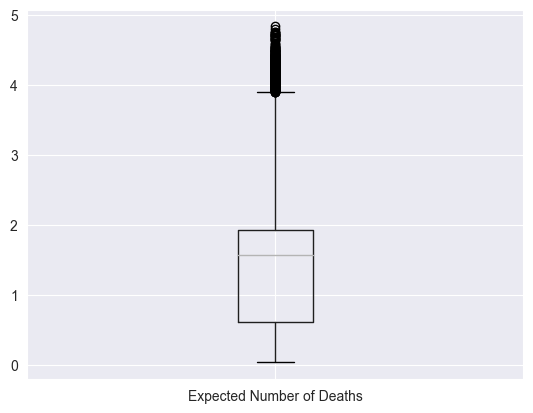

In [39]:
outcomes.boxplot(column = 'Expected Number of Deaths')
plt.show()

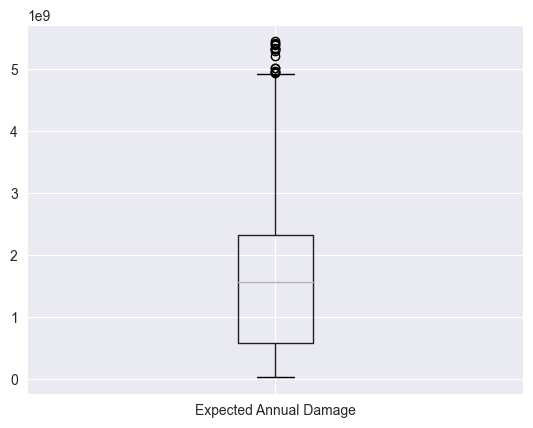

In [40]:
outcomes.boxplot(column='Expected Annual Damage')
plt.show()

# Multiscatter plot

Below the multi scatter plot for the outcomes of the base case is presented. A multi scatter plot plots each scenario with the combination of each outcome on the axes. By plotting each scenario, it could visually be seen whether there exists a correlation between two outcomes, given all scenario's.

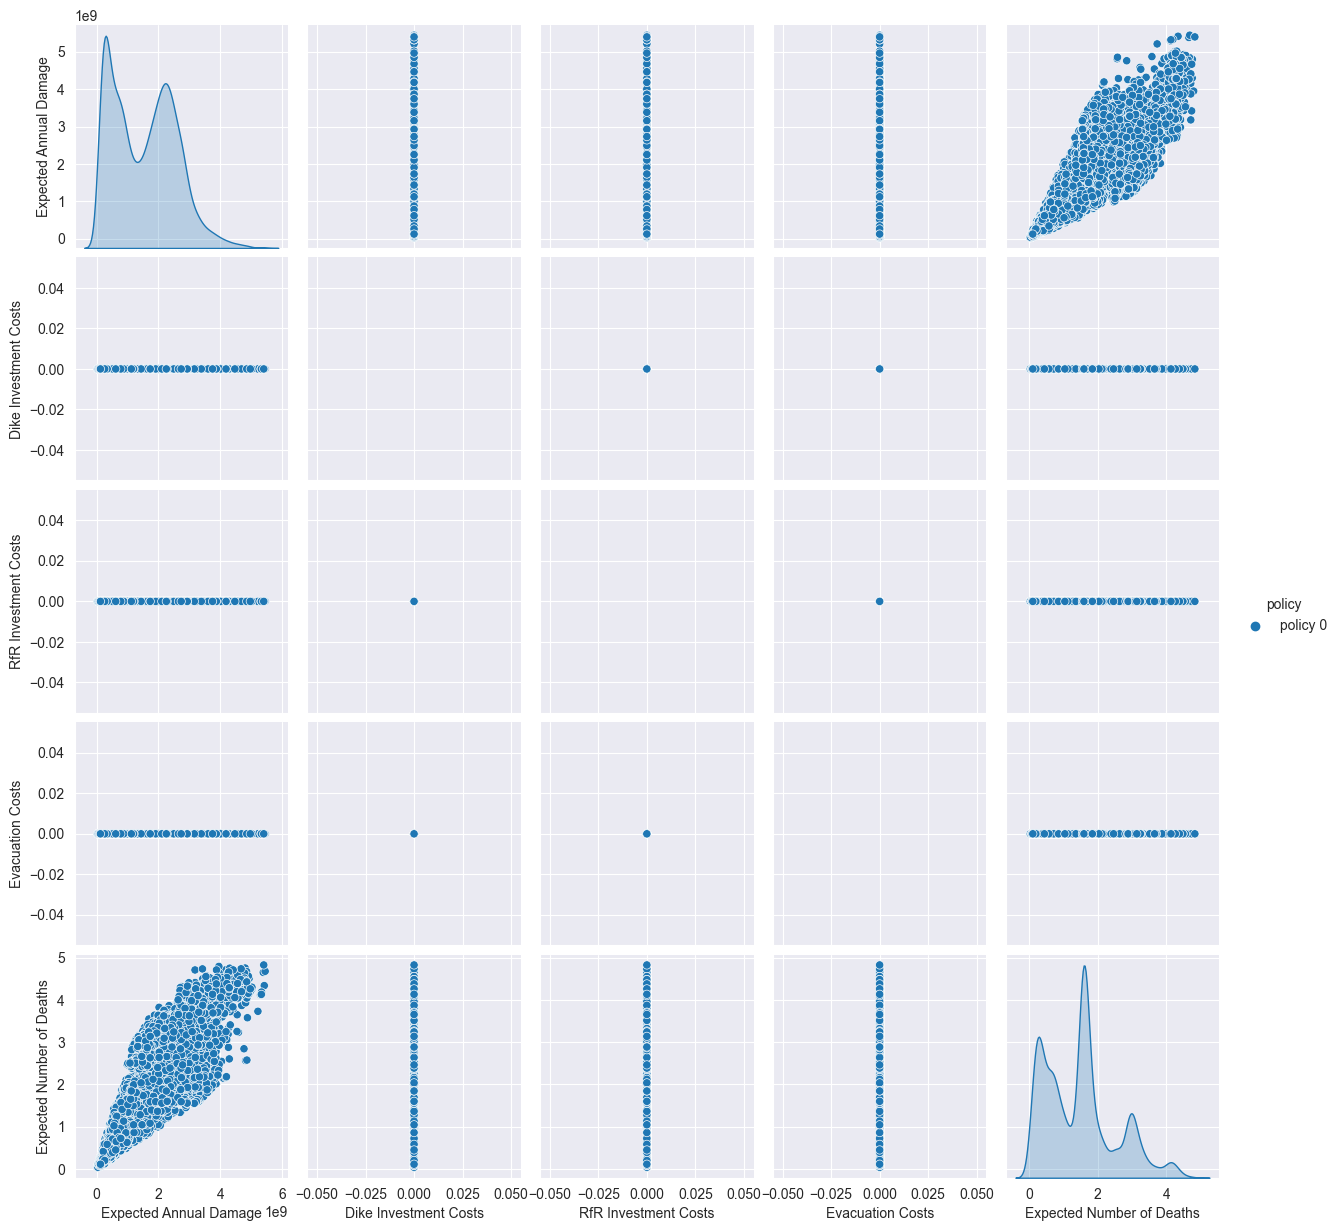

In [41]:
sns.pairplot(outcomes, hue='policy')
plt.show()

The multi scatter plot shows that there seems to exist a positive correlation between the expected number of deaths and the expected actual damage. It implies that the higher the annual damage, the higher the number of deaths will be. All other outcomes logically shows a zero value in the plot, due to the fact that no policies were applied.

# Feature scoring

Feature scoring can be applied to identify which and to what degree certain features of the model influences the model outcomes. In this open exploration the feature scoring technique is used in order to identify how the uncertainties influence our model outcomes, seen over all scenarios.

In [42]:
# A list has been created of uncertainties in the model
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,4.5,1.5,110,334.008648,0.729263,10.0,259.565899,0.673660,10.0,104.948965,0.550382,10.0,198.370991,0.653486,10.0,145.140836,0.889992,10.0
1,3.5,4.5,3.5,56,158.582973,0.641079,10.0,327.393379,0.330776,1.0,253.114312,0.109510,1.5,273.861786,0.859324,1.0,41.255008,0.692840,1.5
2,2.5,4.5,4.5,80,299.733430,0.184624,10.0,281.087283,0.481512,1.0,105.280240,0.930467,1.0,94.898093,0.475867,10.0,254.955270,0.756406,1.0
3,2.5,2.5,3.5,61,151.914404,0.153804,1.5,176.530917,0.630006,10.0,272.552747,0.762337,10.0,212.494144,0.434449,1.0,108.918810,0.123266,10.0
4,4.5,1.5,1.5,80,309.749958,0.422138,1.0,307.063572,0.217711,10.0,331.690263,0.705076,1.5,242.262578,0.815530,10.0,80.963535,0.527218,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.5,1.5,2.5,24,219.930246,0.891368,1.0,275.617704,0.423842,10.0,30.879098,0.889828,10.0,108.256773,0.813547,1.0,131.030426,0.915500,10.0
19996,4.5,1.5,3.5,26,192.896909,0.061889,10.0,150.176897,0.138363,1.5,299.317904,0.466195,1.5,192.212422,0.401485,10.0,113.526934,0.387252,10.0
19997,2.5,3.5,4.5,103,128.071261,0.054128,1.5,110.143125,0.690233,1.5,36.941079,0.445781,1.5,101.379230,0.562266,1.0,144.067864,0.035823,1.0
19998,1.5,2.5,4.5,119,186.803366,0.462298,10.0,125.963852,0.384373,1.0,327.711865,0.702281,10.0,86.548600,0.662147,1.5,141.285189,0.340833,10.0


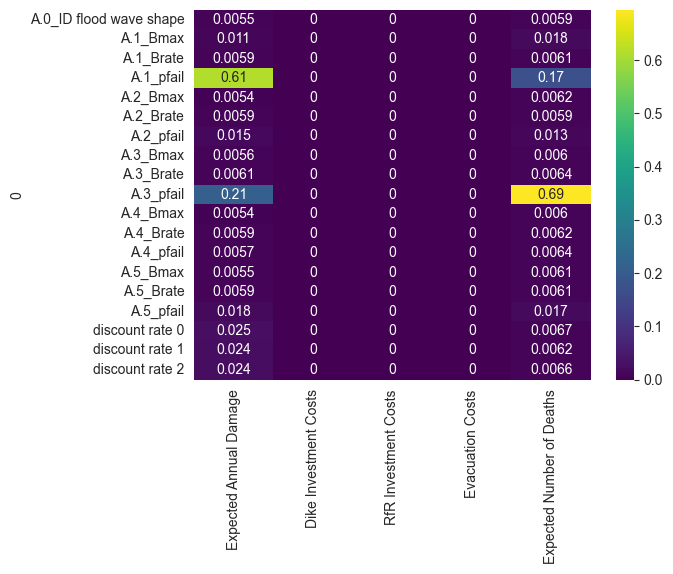

In [43]:
# Plotting and calculating the feature scoring for each uncertainty and all outcomes
fs = feature_scoring.get_feature_scores_all(uncertainty_experiments, outcomes.drop(columns='policy'))
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

The feature scoring shows that primarily the pfail of dike ring A1 and A3 affects the expected number of death and annual damages. It can be seen that the expected annual damages is mostly influenced by the chance that the dike fails at dike ring A1, while the chance that the dike of A3 fails mainly influences the expected number of deaths.

# Scenario Discovery: PRIM

Below scenario discovery has been applied, using PRIM. It is chosen to focus at the 10% worst outcomes for both the number of expected deaths and the expected annual damage. This means that only 10% of all scenarios with either the highest number of expected deaths or the highest expected annual damage are included.

The PRIM algorithm was used with the default value for the peeling alfa and a value of 0.8 as threshold. 0.8 was chosen after conducting a small sensitivty analysis, which showed that the use of another threshold did not lead to significantly different results


Wel nog iets toevoegen over keuze van box!!
### Expected Number of Deaths

In [ ]:
# applying PRIM to the 10% worst outcomes for the expected number of deaths (highest number of deaths)
x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'] > np.percentile(outcomes['Expected Number of Deaths'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()




In [ ]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(40)
box1.inspect(40, style="graph")
box1.show_pairs_scatter(40)
plt.show()

### Expected annual damage

In [ ]:
# applying PRIM to the 10% worst outcomes for the expected number of deaths (highest number of deaths)

x = uncertainty_experiments
y = outcomes['Expected Annual Damage'] > np.percentile(outcomes['Expected Annual Damage'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [ ]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(0)
box1.inspect(0, style="graph")
box1.show_pairs_scatter(0)
plt.show()

# Dimensional stacking

The dimensional stacking can be seen as a visual way to again identify which and to what degree uncertainties influence the model outcomes. The result of the dimenstional stacking is a pivot table with bins, showing only the most important uncertainties that affect the models behaviour.

### Expected Number of Deaths

In [ ]:
x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'].values > np.percentile(outcomes['Expected Number of Deaths'],90)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()

Hoe las je deze ook alweer af???

It can be seen that the fail chances of the dikes of dike rings A1 and A3 are identified as the most important uncertainties for the system behaviour of the dike model, regarding the expected number of deaths. Also, the B-max of those dike rings has been analysed as important and influential. It thus appears that the uncertainties of especially dike ring 1 and 2 have high influence to the expected number of deaths.

### Expected Annual Damage

In [ ]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Annual Damage'].values > np.percentile(outcomes['Expected Annual Damage'],90)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()

The same conclusion as for the number of expected deaths can be drawn for the expected annual damage; the fail chances of the dikes in dike rings A1 and A3 have high influence to the annual damage. It can also be seen that the discount rates are of high importance. This makes sense due to the fact that the exoected annual damage is being monitized over time by the discount rate; the value of the discount rate therefore influences the magnitude of the expected costs. This is reflected in the results.

# Create worst case scenario

The coding below has been used to create a worst case scenario. The uncertainty values of this worst case scenario will be used as reference case in the further steps of the MORDM. The worst case scenario has been defined as the scenario with the highest amount of expected deaths and highest expected annual damage.

In [ ]:
# As a first step, the scenarios that belong to the worst 10% of both objectives are selected
select_worst_outcomes = outcomes[(outcomes['Expected Annual Damage']  > np.percentile(outcomes['Expected Annual Damage'],90)) & (outcomes['Expected Number of Deaths']  > np.percentile(outcomes['Expected Number of Deaths'],90))]
select_worst_outcomes

In [ ]:
# We want to know which values of the uncertainties belongs to the worst case scenario. Therefore, we again use only the uncertainty columns of the experiments.
ncertainty_experiments

In [ ]:
# In order to match the outcomes with their uncertainty values the uncertainty columns are merged with the selected worst case outcomes
merged_columns = pd.merge(select_worst_outcomes , uncertainty_experiments , left_index=True, right_index=True)
merged_columns

In [ ]:
# For the reference case the mean values of these uncertainties are taken. The values are printed below
uncertainty_col_merged = merged_columns.loc[:,list_of_uncertainties]
uncertainty_col_merged.mean(axis=0)

In [ ]:
# Since the value of the A.0_ID flood wave shape is ???, it is chosen to use the value of the scenario in which both the expected number of deaths as well as the expected annual damage are maximized
# Scenario 19230 is selected; 84 will be taken as worst case value
merged_columns.sort_values(by=['Expected Number of Deaths','Expected Annual Damage'],ascending =False)

Maximized for Expected Number of Deaths & Expected Annual Damage, so flood wave shape selected for worst case; 84

## Plaatjes voor verslag genereren

In [ ]:
select_rows_deaths =  outcomes[(outcomes['Expected Number of Deaths']  > np.percentile(outcomes['Expected Number of Deaths'],90))]
select_rows_deaths

In [ ]:
select_rows_damage =  outcomes[(outcomes['Expected Annual Damage']  > np.percentile(outcomes['Expected Annual Damage'],90))]
select_rows_damage

In [ ]:
select_rows_deaths.boxplot(column='Expected Number of Deaths')

In [ ]:
select_rows_damage.boxplot(column='Expected Annual Damage')

In [ ]:
select_rows_deaths_lowest =  outcomes[(outcomes['Expected Number of Deaths']  < np.percentile(outcomes['Expected Number of Deaths'],10))]
select_rows_deaths_lowest

In [ ]:
select_rows_damage_lowest =  outcomes[(outcomes['Expected Annual Damage']  < np.percentile(outcomes['Expected Annual Damage'],10))]
select_rows_deaths_lowest

In [ ]:
select_rows_deaths_lowest.boxplot(column='Expected Number of Deaths')

In [ ]:
select_rows_deaths_lowest.boxplot(column='Expected Annual Damage')

In [ ]:
outcomes.boxplot(column='Expected Number of Deaths')

In [ ]:
outcomes.boxplot(column='Expected Annual Damage')